In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt 

In [2]:
model_df = pd.read_csv(os.path.join("data", "Modeling_data.csv"))
model_df.head()

,loanId,memberId,date,purpose,isJointApplication,loanAmount,term,interestRate,monthlyPayment,grade,...,lengthCreditHistory_bins,numTotalCreditLines_bins,numOpenCreditLines_bins,numOpenCreditLines1Year_bins,revolvingBalance_bins,revolvingUtilizationRate_bins,numDerogatoryRec_bins,numDelinquency2Years_bins,numChargeoff1year_bins,numInquiries6Mon_bins
0,1888978,2305095,12/10/2014,debtconsolidation,0.0,25190.0,60 months,6.25,490,E3,...,0 to 8,> 2,> 5,6,13799 to 14345,0 to 49.88,0,> 0,> 0,0
1,1299695,2610493,9/15/2014,debtconsolidation,0.0,21189.0,60 months,10.49,455,B3,...,> 8,> 2,> 5,4,17374 to 18877,60.01 to 74.25,1,0,0,0
2,1875016,2491679,9/11/2014,debtconsolidation,0.0,29908.0,60 months,9.11,622,B2,...,0 to 8,> 2,3 to 5,5,0 to 11912,60.01 to 74.25,0,> 0,> 0,0
3,1440478,2092798,4/22/2016,homeimprovement,0.0,13053.0,48 months,11.89,343,B3,...,> 8,> 2,> 5,0 to 3,14785 to 15360,60.01 to 74.25,1,0,0,> 0
4,1124634,2633077,2/3/2016,debtconsolidation,0.0,24613.0,60 months,15.13,587,A3,...,0 to 8,> 2,> 5,> 9,> 18877,49.88 to 60.01,> 1,> 0,> 0,> 0


In [3]:
model_df.dtypes

loanId                             int64
memberId                           int64
date                              object
purpose                           object
isJointApplication               float64
loanAmount                       float64
term                              object
interestRate                     float64
monthlyPayment                     int64
grade                             object
loanStatus                        object
residentialState                  object
yearsEmployment                   object
homeOwnership                     object
annualIncome                       int64
incomeVerified                     int64
dtiRatio                         float64
lengthCreditHistory                int64
numTotalCreditLines                int64
numOpenCreditLines               float64
numOpenCreditLines1Year            int64
revolvingBalance                   int64
revolvingUtilizationRate         float64
numDerogatoryRec                   int64
numDelinquency2Y

In [4]:
cat_vars=['purpose', 'term', 'yearsEmployment', 'homeOwnership']

for var in cat_vars:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(model_df[var], prefix=var)
    aux = model_df.join(cat_list)
    model_df = aux
    
model_df_vars = model_df.columns.values.tolist()
to_keep = [i for i in model_df_vars if (i not in cat_vars and "bins" not in i)]
model_df_final = model_df[to_keep]
model_df_final.columns

Index(['loanId', 'memberId', 'date', 'isJointApplication', 'loanAmount',
       'interestRate', 'monthlyPayment', 'grade', 'loanStatus',
       'residentialState', 'annualIncome', 'incomeVerified', 'dtiRatio',
       'lengthCreditHistory', 'numTotalCreditLines', 'numOpenCreditLines',
       'numOpenCreditLines1Year', 'revolvingBalance',
       'revolvingUtilizationRate', 'numDerogatoryRec', 'numDelinquency2Years',
       'numChargeoff1year', 'numInquiries6Mon', 'default', 'purpose_auto',
       'purpose_business', 'purpose_debtconsolidation', 'purpose_education',
       'purpose_healthcare', 'purpose_homeimprovement', 'purpose_other',
       'term_36 months', 'term_48 months', 'term_60 months',
       'yearsEmployment_1 year', 'yearsEmployment_10+ years',
       'yearsEmployment_2-5 years', 'yearsEmployment_6-9 years',
       'yearsEmployment_< 1 year', 'homeOwnership_mortgage',
       'homeOwnership_own', 'homeOwnership_rent'],
      dtype='object')

In [5]:
target = model_df_final["default"]
target_names = ["current", "default"]
data = model_df_final.drop(["loanStatus","default","loanId","memberId","date","residentialState","grade",
                           "interestRate",'monthlyPayment',], axis=1)
feature_names = data.columns
feature_names

Index(['isJointApplication', 'loanAmount', 'annualIncome', 'incomeVerified',
       'dtiRatio', 'lengthCreditHistory', 'numTotalCreditLines',
       'numOpenCreditLines', 'numOpenCreditLines1Year', 'revolvingBalance',
       'revolvingUtilizationRate', 'numDerogatoryRec', 'numDelinquency2Years',
       'numChargeoff1year', 'numInquiries6Mon', 'purpose_auto',
       'purpose_business', 'purpose_debtconsolidation', 'purpose_education',
       'purpose_healthcare', 'purpose_homeimprovement', 'purpose_other',
       'term_36 months', 'term_48 months', 'term_60 months',
       'yearsEmployment_1 year', 'yearsEmployment_10+ years',
       'yearsEmployment_2-5 years', 'yearsEmployment_6-9 years',
       'yearsEmployment_< 1 year', 'homeOwnership_mortgage',
       'homeOwnership_own', 'homeOwnership_rent'],
      dtype='object')

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data, target)
clf.score(data, target)

1.0

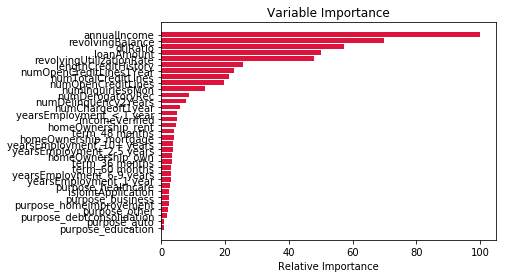

In [7]:
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_features = np.argsort(feature_importance)
pos = np.arange(sorted_features.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_features], align='center', color='crimson')
plt.title('Variable Importance')
plt.xlabel('Relative Importance')

plt.yticks(pos, data.columns[sorted_features])

plt.show()

In [8]:
feature_importance_list=sorted(zip(clf.feature_importances_, feature_names), reverse=True)
feature_importance_list

[(0.19517366840740763, 'annualIncome'),
 (0.1366570842898925, 'revolvingBalance'),
 (0.11163745926912524, 'dtiRatio'),
 (0.0980539247748933, 'loanAmount'),
 (0.09373491913347831, 'revolvingUtilizationRate'),
 (0.05017926014070059, 'lengthCreditHistory'),
 (0.04442489925417612, 'numOpenCreditLines1Year'),
 (0.04134204893087996, 'numTotalCreditLines'),
 (0.03824542164964538, 'numOpenCreditLines'),
 (0.02689663982295045, 'numInquiries6Mon'),
 (0.016781492180855135, 'numDerogatoryRec'),
 (0.015209250952534264, 'numDelinquency2Years'),
 (0.011534477352112169, 'numChargeoff1year'),
 (0.009746480650683967, 'yearsEmployment_< 1 year'),
 (0.009557063061224351, 'incomeVerified'),
 (0.009213201579243692, 'homeOwnership_rent'),
 (0.007726462296497971, 'term_48 months'),
 (0.0075440056372561, 'homeOwnership_mortgage'),
 (0.007431927954909433, 'yearsEmployment_10+ years'),
 (0.007281460476328906, 'yearsEmployment_2-5 years'),
 (0.006432887925794154, 'homeOwnership_own'),
 (0.006421267465413079, 'ter

In [9]:
feature_selected=[feature[1] for feature in feature_importance_list if (feature[0]>=0.01)]
feature_selected

['annualIncome',
 'revolvingBalance',
 'dtiRatio',
 'loanAmount',
 'revolvingUtilizationRate',
 'lengthCreditHistory',
 'numOpenCreditLines1Year',
 'numTotalCreditLines',
 'numOpenCreditLines',
 'numInquiries6Mon',
 'numDerogatoryRec',
 'numDelinquency2Years',
 'numChargeoff1year']

# Data Spliting

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

# Decison Tree

In [11]:
tree_param = {'criterion': ["gini","entropy"],
              'min_samples_split' : [50],
              'max_depth': [2, 5, 10]
             }
tree_classificator = tree.DecisionTreeClassifier()
tree_classificator_best = GridSearchCV(estimator=tree_classificator, param_grid=tree_param, cv=5)

tree_classificator_best=tree_classificator_best.fit(X_train[feature_selected], y_train)
print(tree_classificator_best.best_params_)
print(tree_classificator_best.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 50}
0.908534384630334


In [12]:
tree_classificator = tree.DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=50)
tree_classificator=tree_classificator.fit(X_train[feature_selected], y_train)
tree_classificator.score(X_test[feature_selected], y_test)

0.9037188189730563

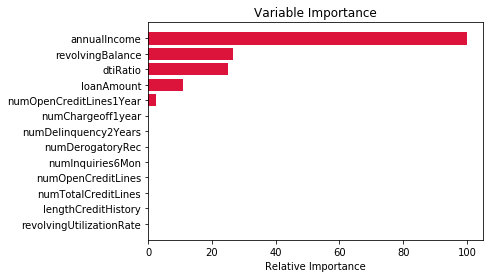

In [13]:
feature_importance = tree_classificator.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_features = np.argsort(feature_importance)
pos = np.arange(sorted_features.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_features], align='center', color='crimson')
plt.title('Variable Importance')
plt.xlabel('Relative Importance')

plt.yticks(pos, X_train[feature_selected].columns[sorted_features])

plt.show()

In [14]:
y_pred = tree_classificator.predict(X_test[feature_selected])
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
print("Decion Tree")
print('\nTrue positive: ', matrix[0][0])
print('False positive: ', matrix[0][1])
print('True Negative: ', matrix[1][1])
print('False Negative: ', matrix[1][0])
print('\n\nClassification Report\n', classification_report(y_test, y_pred))
print('-------------------------------------------------------')

[[21332   192]
 [ 2120   369]]
Decion Tree

True positive:  21332
False positive:  192
True Negative:  369
False Negative:  2120


Classification Report
              precision    recall  f1-score   support

          0       0.91      0.99      0.95     21524
          1       0.66      0.15      0.24      2489

avg / total       0.88      0.90      0.88     24013

-------------------------------------------------------


# Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()

rf_param = {'n_estimators': [10, 100, 200],
              'criterion' : ['gini'],
              'min_samples_split' : [50],
              'max_depth': [2, 5, 10]}

rf_best = GridSearchCV(estimator=rf, param_grid=rf_param, cv=5)
rf_best.fit(X_train[feature_selected], y_train)


print(rf_best.best_params_)
print(rf_best.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 50, 'n_estimators': 200}
0.9119353674449596


In [16]:
rf = RandomForestClassifier(n_estimators=100,
              criterion='gini',
              min_samples_split=50,
              max_depth= 10)
rf=rf.fit(X_train[feature_selected], y_train)

In [17]:
y_pred = rf.predict(X_test[feature_selected])
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
print("Random Forest")
print('\nTrue positive: ', matrix[0][0])
print('False positive: ', matrix[0][1])
print('True Negative: ', matrix[1][1])
print('False Negative: ', matrix[1][0])
print('\n\nClassification Report\n', classification_report(y_test, y_pred))
print('-------------------------------------------------------')

[[21413   111]
 [ 2094   395]]
Random Forest

True positive:  21413
False positive:  111
True Negative:  395
False Negative:  2094


Classification Report
              precision    recall  f1-score   support

          0       0.91      0.99      0.95     21524
          1       0.78      0.16      0.26      2489

avg / total       0.90      0.91      0.88     24013

-------------------------------------------------------


# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
# from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train[feature_selected], y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
y_pred = logreg.predict(X_test[feature_selected])
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
print("Logistic Regression")
print('\nTrue positive: ', matrix[0][0])
print('False positive: ', matrix[0][1])
print('True Negative: ', matrix[1][1])
print('False Negative: ', matrix[1][0])
print('\n\nClassification Report\n', classification_report(y_test, y_pred))
print('-------------------------------------------------------')

[[21454    70]
 [ 2331   158]]
Logistic Regression

True positive:  21454
False positive:  70
True Negative:  158
False Negative:  2331


Classification Report
              precision    recall  f1-score   support

          0       0.90      1.00      0.95     21524
          1       0.69      0.06      0.12      2489

avg / total       0.88      0.90      0.86     24013

-------------------------------------------------------


# Deep Learning

In [20]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train[feature_selected])
X_train_scaled = X_scaler.transform(X_train[feature_selected])
X_test_scaled = X_scaler.transform(X_test[feature_selected])

from keras.utils import to_categorical

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

C:\Users\marce\Anaconda3\envs\MarceloEnvironment\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [24]:
from keras.models import Sequential
from keras.layers import Dense

deep = Sequential()
deep.add(Dense(units=13, activation='relu', input_dim=13))
deep.add(Dense(units=13, activation='relu'))
deep.add(Dense(units=13, activation='relu'))
deep.add(Dense(units=2, activation='softmax'))
deep.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_6 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_7 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 28        
Total params: 574
Trainable params: 574
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model
deep.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# Fit the model to the training data
deep.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2)

Epoch 1/100
 - 3s - loss: 0.2541 - acc: 0.9091
Epoch 2/100
 - 3s - loss: 0.2343 - acc: 0.9127
Epoch 3/100
 - 3s - loss: 0.2311 - acc: 0.9137
Epoch 4/100
 - 3s - loss: 0.2288 - acc: 0.9142
Epoch 5/100
 - 3s - loss: 0.2268 - acc: 0.9152
Epoch 6/100
 - 3s - loss: 0.2255 - acc: 0.9154
Epoch 7/100
 - 3s - loss: 0.2243 - acc: 0.9152
Epoch 8/100
 - 3s - loss: 0.2234 - acc: 0.9155
Epoch 9/100
 - 3s - loss: 0.2228 - acc: 0.9160
Epoch 10/100
 - 3s - loss: 0.2223 - acc: 0.9159
Epoch 11/100
 - 3s - loss: 0.2220 - acc: 0.9157
Epoch 12/100
 - 3s - loss: 0.2215 - acc: 0.9159
Epoch 13/100
 - 3s - loss: 0.2213 - acc: 0.9160
Epoch 14/100
 - 3s - loss: 0.2211 - acc: 0.9158
Epoch 15/100
 - 3s - loss: 0.2208 - acc: 0.9160
Epoch 16/100
 - 3s - loss: 0.2205 - acc: 0.9160
Epoch 17/100
 - 3s - loss: 0.2206 - acc: 0.9159
Epoch 18/100
 - 3s - loss: 0.2204 - acc: 0.9166
Epoch 19/100
 - 3s - loss: 0.2199 - acc: 0.9165
Epoch 20/100
 - 3s - loss: 0.2200 - acc: 0.9165
Epoch 21/100
 - 3s - loss: 0.2198 - acc: 0.9160
E

# Model Assessment

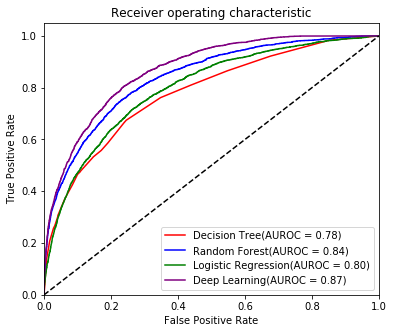

In [27]:
# y_pred_tree = tree_classificator.predict(X_test[feature_selected])
# y_pred_rf = rf.predict(X_test[feature_selected])
# y_pred_logreg = logreg.predict(X_test[feature_selected])

colors = ['red', 'blue', 'green','purple']

plt.figure(figsize=(6,5))

classifiers = [tree_classificator, rf, logreg, deep]
classifier_name = ['Decision Tree', 'Random Forest','Logistic Regression','Deep Learning']
feature_selected_list = [feature_selected,feature_selected,feature_selected,feature_selected]

for i in range(0, len(classifiers)):
    classifier = classifiers[i]
    #y_pred = classifier.predict(X_test[feature_selected_list[i]])
       
    fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test[feature_selected_list[i]])[:,1])
    if i == 3:
        fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test_scaled)[:,1])  
        
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=str(classifier_name[i]) + '(AUROC = %0.2f)' % roc_auc,color=colors[i])
    
plt.plot([0, 1], [0, 1],'r--',color="black")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()


# Save the Models

In [42]:
import pickle

# Decision Tree
with open('models/tree.pkl', 'wb') as fid:
    pickle.dump(tree_classificator, fid, 2)

# Logistic Regression
with open('models/logreg.pkl', 'wb') as fid:
    pickle.dump(logreg, fid, 2)
    
# Random Forest
with open('models/rf.pkl', 'wb') as fid:
    pickle.dump(rf, fid, 2)
    
# Neural Network
with open('models/neural.pkl', 'wb') as fid:
    pickle.dump(deep, fid, 2)
    
# X Scaler for Neural Network
with open('models/XScaler.pkl', 'wb') as fid:
    pickle.dump(X_scaler, fid, 2)

# Testing Flask Code

In [43]:
inputs = [[50000, 10000, 20, 10000, 50, 10, 1, 15, 7, 1, 1, 1, 1]]

In [53]:
model_files = ['models/tree.pkl', 'models/logreg.pkl', 'models/rf.pkl', 'models/neural.pkl']
model_names = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'Neural Network']
outputs = []

for i in range(0, len(model_names)):
    pkl_file = open(model_files[i], 'rb')
    model = pickle.load(pkl_file)
    if model_names[i] == 'Neural Network':
        scaler = pickle.load(open('models/XScaler.pkl', 'rb'))
        inputs_scaled = scaler.transform(inputs)
        dict = {
            'Model': model_names[i],
            'Pred' : model.predict_classes(inputs_scaled)[0],
            'Prob' : model.predict_proba(inputs_scaled)[:,1][0]
        }
    else:
        dict = {
            'Model': model_names[i],
            'Pred' : model.predict(inputs)[0],
            'Prob' : model.predict_proba(inputs)[:,1][0]
        }
        
    outputs.append(dict)
    
outputs

[{'Model': 'Decision Tree', 'Pred': 0, 'Prob': 0.1255017393631255},
 {'Model': 'Logistic Regression', 'Pred': 0, 'Prob': 0.043552386778873936},
 {'Model': 'Random Forest', 'Pred': 0, 'Prob': 0.1769400397739792},
 {'Model': 'Neural Network', 'Pred': 0, 'Prob': 4.8513978e-20}]